# 1. LOGISTIC REGRESION (me falta el cross validation)

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

PARA SEPARAR TRAIN Y TEST

In [471]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/processed.csv')
train, test = train_test_split(df, test_size=0.33, shuffle=True) #con shuffle, que los videos estaban ordenados por visualizaciones

train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

TRAIN

In [472]:
train = pd.read_csv('data/train.csv')
train.head(1)

,Título del vídeo,Visualizaciones,Porcentaje de clics de las impresiones (%),Med Juego Compartido,Med Horas vistas Juego,Med Impresiones Juego,Med porcentaje clicks Impresiones Juego,Med Visualizaciones Juego,Med Suscriptores Juego,Med Visualizaciones Año,Visualizaciones necesarias para suscribirse al canal,Visualizaciones necesarias para compartir el video
0,Raid nocturno - Ark ep. 24,112,1.78,1.978723,55.4977,999.340426,3.463191,737.468085,1.510638,244.659091,112.0,112.0


ELIMINACIÓN DE COLUMNAS SIN CORRELACIÓN: ya eliminadas en la parte de 02_preprocesamiento.

PREDICTORAS Y TARGET

In [473]:
X = train.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = train['Visualizaciones']

PREPARACIÓN DE DATOS

In [474]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

In [475]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [476]:
y_pred = lr.predict(X_test) #predicciones

TEST

In [477]:
test = pd.read_csv('data/test.csv')

In [478]:
X = test.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = test['Visualizaciones']

In [479]:
predicciones_finales = lr.predict(X)

ENTREGA

In [480]:
#para hacer el dataframe final
DTpredicciones = pd.DataFrame(predicciones_finales)
DTpredicciones.reset_index(drop=True, inplace=True) #para que se quiten los indices
id = test.loc[:, ['Título del vídeo']]
id.reset_index(drop=True, inplace=True)
df_unido = id.join(DTpredicciones) #unir

In [481]:
df_unido.head()

,Título del vídeo,0
0,Formación tortuga romana con legionarios - Rom...,7930.852823
1,¿Qué haces? - LoL in 2015,122.061015
2,Coalición Hispánica #5 | COOPERATIVO CON MANUTEZ,69.445616
3,Coalición Hispánica #22 | INDEPENDENCIA DE LAS...,-884.573930
4,Napoleón TW España 47 - Cómo acabar por mar co...,691.050850


In [482]:
df_unido.columns = ['Título del vídeo', 'Visualizaciones'] #para cambiar las columnas

In [483]:
df_unido['Visualizaciones'] = df_unido['Visualizaciones'].round(0).astype('int') #para redondear las visualizaciones y poner la columna en números enteros

In [484]:
df_unido.head()

,Título del vídeo,Visualizaciones
0,Formación tortuga romana con legionarios - Rom...,7931
1,¿Qué haces? - LoL in 2015,122
2,Coalición Hispánica #5 | COOPERATIVO CON MANUTEZ,69
3,Coalición Hispánica #22 | INDEPENDENCIA DE LAS...,-885
4,Napoleón TW España 47 - Cómo acabar por mar co...,691


In [485]:
#df_unido.to_csv('siralatriste_submission.csv', index=False) #para pasar el dataframe a csv

PARA GUARDAR EL MODELO

In [486]:
import pickle

In [487]:
with open('modelo_LR.pkl', 'wb') as archivo:
    pickle.dump(lr, archivo)

# 2. RANDOM FOREST REGRESSOR con GradientBoostingRegressor

In [488]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [489]:
df = pd.read_csv('data/processed.csv')

""" train, test = train_test_split(df, test_size=0.33, shuffle=True) #con shuffle, que los videos estaban ordenados por visualizaciones """

' train, test = train_test_split(df, test_size=0.33, shuffle=True) #con shuffle, que los videos estaban ordenados por visualizaciones '

In [490]:
""" train = pd.read_csv('data/train.csv')
train.head(1) """

" train = pd.read_csv('data/train.csv')\ntrain.head(1) "

In [491]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [492]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Título del vídeo                                      332 non-null    object 
 1   Visualizaciones                                       332 non-null    int64  
 2   Porcentaje de clics de las impresiones (%)            332 non-null    float64
 3   Med Juego Compartido                                  332 non-null    float64
 4   Med Horas vistas Juego                                332 non-null    float64
 5   Med Impresiones Juego                                 332 non-null    float64
 6   Med porcentaje clicks Impresiones Juego               332 non-null    float64
 7   Med Visualizaciones Juego                             332 non-null    float64
 8   Med Suscriptores Juego                                332 no

In [493]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

In [494]:
model = RandomForestRegressor(n_estimators=100, random_state=33)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=33)

In [495]:
RandomForestRegressor(random_state=33)

RandomForestRegressor(random_state=33)

Esto es sin cross validation

In [496]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

759.3147743902439

Con cross validation:

In [497]:
model_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=100, random_state=33))])

In [498]:
#EVALUATION que hay que pasar al evaluation.py
scores = -1 * cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error') 
#lo multiplico por -1 para que se vea positivo 

In [499]:
scores

array([2324.10623333,  305.09196296,   70.02415488,   55.29088889,
         48.16620635])

In [500]:
scores.mean()

560.5358892833093

# 3. DECISION TREES (DecisionTreeRegressor junto a XGBRegressor, el cual igual quito para ponerlo por separado con el ejemplo de apuntes del test)

In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [502]:
#OJO QUE AQUI EMPIEZO CON TODOS LOS DATOS (data =) NO CON train =
df = pd.read_csv('data/processed.csv')
df['Visualizaciones'] = df.Visualizaciones
#data.head()

GRAFICO INTERESANTE PARA VER DE OTRA MANERA LA CORRELACION DE LAS VARIABLES (Hay que recortar las variables a las que se eligieron)

In [503]:
""" # GRÁFICO PARA VER LA CORRELACION DE LAS VARIABLES
plt.figure(figsize=(5,5))
bars = df.corr()['Visualizaciones'].sort_values(ascending=False).plot(kind='bar') """

" # GRÁFICO PARA VER LA CORRELACION DE LAS VARIABLES\nplt.figure(figsize=(5,5))\nbars = df.corr()['Visualizaciones'].sort_values(ascending=False).plot(kind='bar') "

SLIPT DEL TEST Y DEL DATA

In [504]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

In [505]:
#X_train.head()

FIT DEL MODELO (base)

In [506]:
regressor = XGBRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

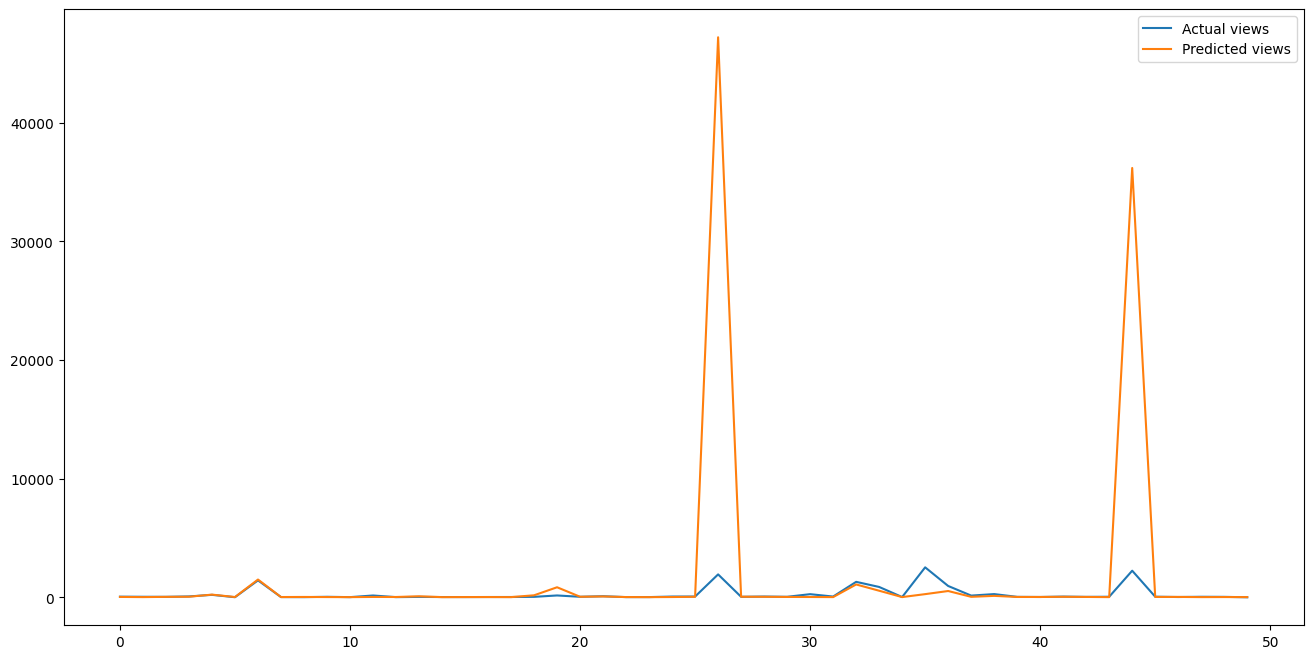

In [507]:
test = pd.DataFrame({'Predicted views':y_pred, 'Actual views':y_test})

fig= plt.figure(figsize=(16,8))

test = test.reset_index() # REVISAR ESTE PASO Y EL DE DESPUÉS
test = test.drop(['index'],axis=1)

plt.plot(test[:50]) #revisar si tengo que coger sobre 50 o más bien la mitad de los datos
plt.legend(['Actual views','Predicted views'])

EVALUATION (pasar al .py después, creo)

In [508]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 822.1366998451512
Mean Squared Error (MSE): 20920384.190538038
Root Mean Squared Error (RMSE): 4573.88064891707


DECISION TREE

In [509]:
param_grid = {
    'max_depth': [None, 2, 3, 4]
}

model = GridSearchCV(
    DecisionTreeRegressor(random_state=33),
    cv=10,
    scoring='neg_mean_squared_error',
    param_grid=param_grid
)

AÑADIR UNA NUEVA FEATURE USANDO EL DECISION TREE COMBINANDO LAS 3 VARIABLES MÁS CORRELADAS

In [510]:
corr = df.corr().abs() #para sacarlo con valores absolutos

C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\662785690.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs() #para sacarlo con valores absolutos


In [511]:
corr_visual = corr.loc[:,['Visualizaciones']] #para sacar las correlaciones de Visualizaciones
corr_visual.sort_values(ascending=False, by = 'Visualizaciones')

,Visualizaciones
Visualizaciones,1.000000
Visualizaciones necesarias para suscribirse al canal,0.392815
Porcentaje de clics de las impresiones (%),0.345555
Visualizaciones necesarias para compartir el video,0.264041
Med Visualizaciones Juego,0.235958
Med Juego Compartido,0.194137
Med Horas vistas Juego,0.184287
Med Impresiones Juego,0.165220
Med Visualizaciones Año,0.149292
Med Suscriptores Juego,0.146927


In [512]:
features_selecc = ['Visualizaciones necesarias para suscribirse al canal', 'Porcentaje de clics de las impresiones (%)', 'Visualizaciones necesarias para compartir el video'] #seleccionar las 3 mejores

model.fit(X_train[features_selecc], y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=33),
             param_grid={'max_depth': [None, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [513]:
GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=11),
             param_grid={'max_depth': [None, 2, 3, 4]},
             scoring='neg_mean_squared_error')

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=11),
             param_grid={'max_depth': [None, 2, 3, 4]},
             scoring='neg_mean_squared_error')

predict() usando el modelo de las 3 variables

In [514]:
X_train = X_train.assign(VAR1_VAR2_VAR3=model.predict(X_train[features_selecc]))
X_test = X_test.assign(VAR1_VAR2_VAR3=model.predict(X_test[features_selecc]))

In [515]:
#X_train.head()

RE-FIT DEL MODELO CON LA NUEVA VARIABLE 

In [516]:
regressor = XGBRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [517]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 774.5938023241555
Mean Squared Error (MSE): 19084000.554793775
Root Mean Squared Error (RMSE): 4368.523841619017


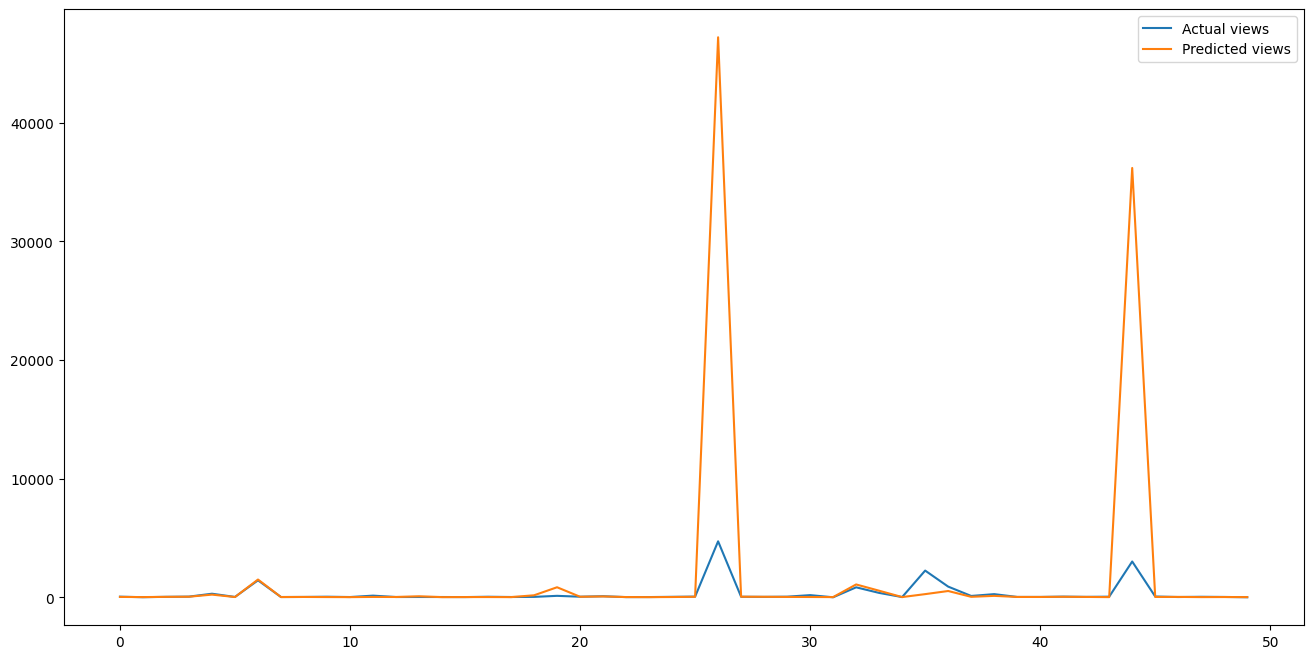

In [518]:
# Esto está copiado de arriba

test = pd.DataFrame({'Predicted views':y_pred, 'Actual views':y_test})

fig= plt.figure(figsize=(16,8))

test = test.reset_index() # REVISAR ESTE PASO Y EL DE DESPUÉS
test = test.drop(['index'],axis=1)

plt.plot(test[:50]) #revisar si tengo que coger sobre 50 o más bien la mitad de los datos
plt.legend(['Actual views','Predicted views'])

# 4. LINEAR REGRESSION

In [519]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [520]:
df = pd.read_csv('data/processed.csv')

In [521]:
#df.info()

In [522]:
""" plt.figure(figsize=(14,8))
bars = df.corr()['Visualizaciones'].sort_values(ascending=False).plot(kind='bar') """

" plt.figure(figsize=(14,8))\nbars = df.corr()['Visualizaciones'].sort_values(ascending=False).plot(kind='bar') "

In [523]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

Por el momento, los datos consisten en valores pequeños y grandes. Hay algunas columnas que tienen valores medianos de más de 2650. Como estas varían tanto en tamaño, confunden en modelo. Para ponerlos todos en una escala uniforme, tengo que usar la función StandardScaler(). Es importante destacar que usamos fit_transform() en nuestros datos de X_train, pero solo usamos fit() en nuestros datos de X_test. No hacer esto puede causar una "fuga de datos".

In [525]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Crear el Modelo de Regresión lineal

In [526]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [527]:
LinearRegression()

LinearRegression()

Predicts

In [528]:
y_pred = model.predict(X_test)

In [529]:
y_pred

array([ 6.52188986e+01,  4.72394428e+00, -7.66642211e+01,  2.08882632e+02,
        7.16986695e+02,  1.75404397e+01,  1.53362772e+03, -2.94945572e+01,
       -9.68582653e+01,  9.86695096e+00,  2.64147317e+01,  4.08064198e+02,
       -3.36623987e+02, -1.79766645e+02,  4.35005039e+01, -2.75322623e+01,
       -2.61031158e+02,  7.92724083e+00,  5.22962427e+01,  4.54395467e+02,
        9.44186724e+01,  1.18318745e+02, -9.07112753e+00, -3.30001847e+01,
        1.76473939e+01, -9.66818863e+01,  3.28428364e+03, -1.15370557e+01,
        2.60889213e+02,  1.93562170e+02,  2.40862584e+02,  2.98161332e+02,
        2.62011218e+03,  1.68487152e+03,  1.23167858e+02,  2.55734137e+02,
        8.08018530e+02,  2.11190519e+02,  5.61165588e+02, -5.80408002e+01,
        7.22258234e+01,  1.32599031e+01, -1.14462394e+02, -1.40621062e+01,
        2.43559591e+03,  1.05753140e+02,  1.28935904e+02,  1.30526042e+02,
       -3.75174096e+01,  8.54863035e+01,  3.62040209e+02,  3.16623423e+02,
        1.52408435e+02,  

Root Mean Squared Error (pasar a evaluation después)

In [530]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSE:  4406.118633526339


MÁS EVALUACION (Pasar tb a evaluation)

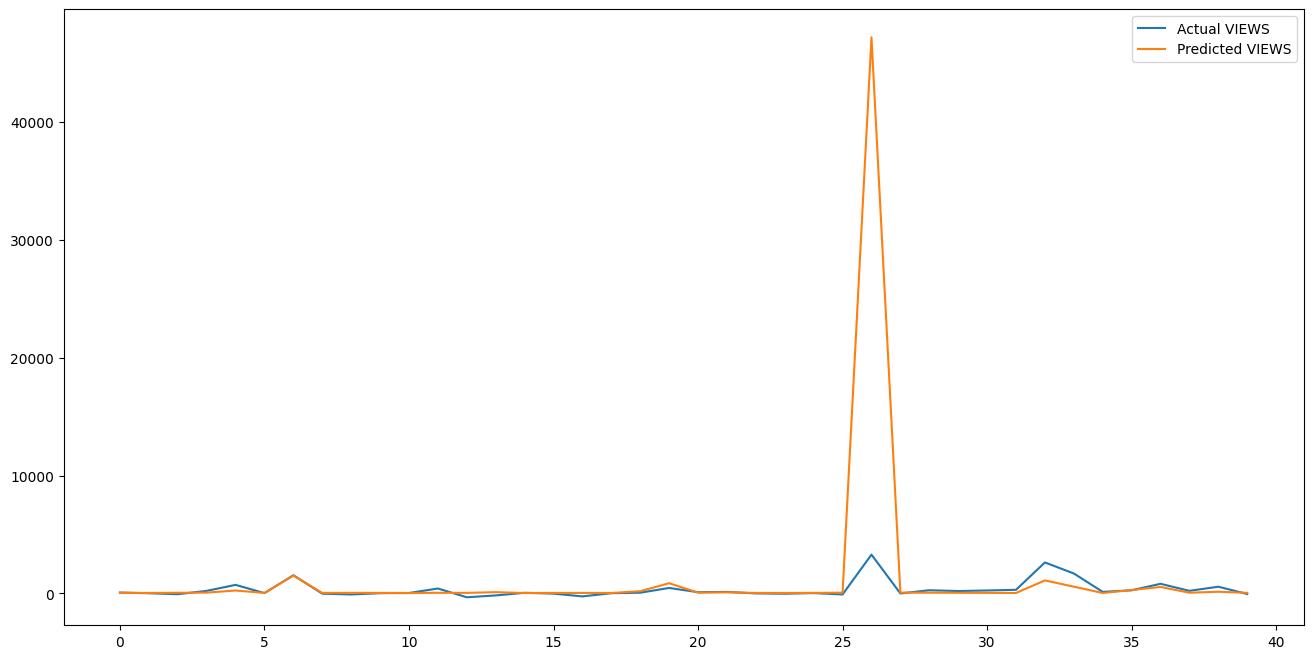

In [531]:
test = pd.DataFrame({'Predicted VIEWS':y_pred, 'Actual VIEWS':y_test})
fig= plt.figure(figsize=(16,8))

test = test.reset_index()
test = test.drop(['index'],axis=1)

plt.plot(test[:40])
plt.legend(['Actual VIEWS','Predicted VIEWS'])

# MALDITOS OUTLIERS

# 5. XGBREGRESSOR CON GRIDSEARCHCV

Hands On Machine Learning: "It is worth noting that an optimized implementation of Gradient Boosting is available
in the popular python library XGBoost, which stands for Extreme Gradient Boosting."

In [579]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [580]:
df = pd.read_csv('data/processed.csv')

In [581]:
df = df.loc[df['Visualizaciones']<35000,:] #quito 2 outliers para ver que tal

In [582]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [583]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

In [584]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [585]:
regressor = XGBRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
test = pd.DataFrame({'Predicted views':y_pred, 'Actual views':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual views','Predicted views'])

In [ ]:
model.get_params() #para ver que parametros tiene

In [589]:
param_grid = dict(
    n_jobs=[-1],
    learning_rate=[0.1, 0.5],
    objective=['reg:squarederror'],
    max_depth=[5, 10, 15], 
    n_estimators=[100, 500, 1000],
    subsample=[0.2, 0.8, 1.0],
    gamma=[0.05, 0.5],
    scale_pos_weight=[0, 1],
    reg_alpha=[0, 0.5],
    reg_lambda=[1, 0],
)

model = XGBRegressor(random_state=1, verbosity=1)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           )

best_model = grid_search.fit(X_train, y_train)
print('Mejores parametros:', best_model.best_params_)

FIT DE LOS MEJORES PARÁMETROS DEL MODELO (esperar a ver qué mejores param da y cambiar lo de abajo)

In [ ]:
regressor = XGBRegressor(
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1
)
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred)) #A EVALUATION

In [ ]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

# EXTRA. MODELO QUE MEJOR SALGA EN EL TEST

In [532]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

CARGAMOS EL DATA

In [533]:
df = pd.read_csv('data/processed.csv')

In [534]:
#df['Visualizaciones']

QUITANDO OUTLIERS (para ayudar al modelo)

In [535]:
df = df.loc[df['Visualizaciones']<35000,:] #quito 2 outliers para ver que tal

Train y test

In [536]:
X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones']

In [537]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33, shuffle=True)

Escalando los datos

In [538]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SELECCIÓN DE MODELO

In [539]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

Esto de abajo recorre cada uno de los modelos, lo ajusta usando los datos de X_train y y_train, y luego genera predicciones de X_test y calcula el RMSE medio de 10 rondas de Cross Validation. Eso nos dará el RMSE para los datos de X_test, más el RMSE promedio para el conjunto de datos de entrenamiento.

In [540]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores = cross_val_score(model, 
                             X_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores)))
    }

    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor


C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* RandomForestRegressor


C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models

* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR


C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models

* LinearSVR
* KernelRidge
* LinearRegression
* Ridge
* Lars
* TheilSenRegressor


C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)
C:\Users\Braulio\AppData\Local\Temp\ipykernel_19392\2732773370.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models

Abajo se ve que al ordenar los resultados del dataframe df_models, se puede ver el rendimiento de cada modelo. La puntuación RMSE de x obtenida de los modelo/s anterior/es se mejoró aquí y ahora se reduce a x. La noticia más importante es que la selección de modelos ha identificado x modelos mucho más efectivos. 

Al quitar los outliers, el modelo PassiveAggressiveRegressor() logró el mejor RMSE medio de 629 y el modelo HuberRegressor un RMSE de 624.

In [541]:
df_models.head(20).sort_values(by='rmse_cv', ascending=True)

,model,run_time,rmse,rmse_cv
13,PassiveAggressiveRegressor,0.0,1423,617
12,HuberRegressor,0.0,1425,624
16,ElasticNet,0.0,1386,625
15,BayesianRidge,0.0,1378,634
11,TheilSenRegressor,0.1,1424,638
14,ARDRegression,0.0,1387,641
9,Ridge,0.0,1379,643
8,LinearRegression,0.0,1380,645
10,Lars,0.0,1380,647
1,RandomForestRegressor,0.04,1361,710


Evaluar el modelo de mejor rendimiento (tengo que pasarlo al evaluation.py correspondiente)

In [551]:
regressor = PassiveAggressiveRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

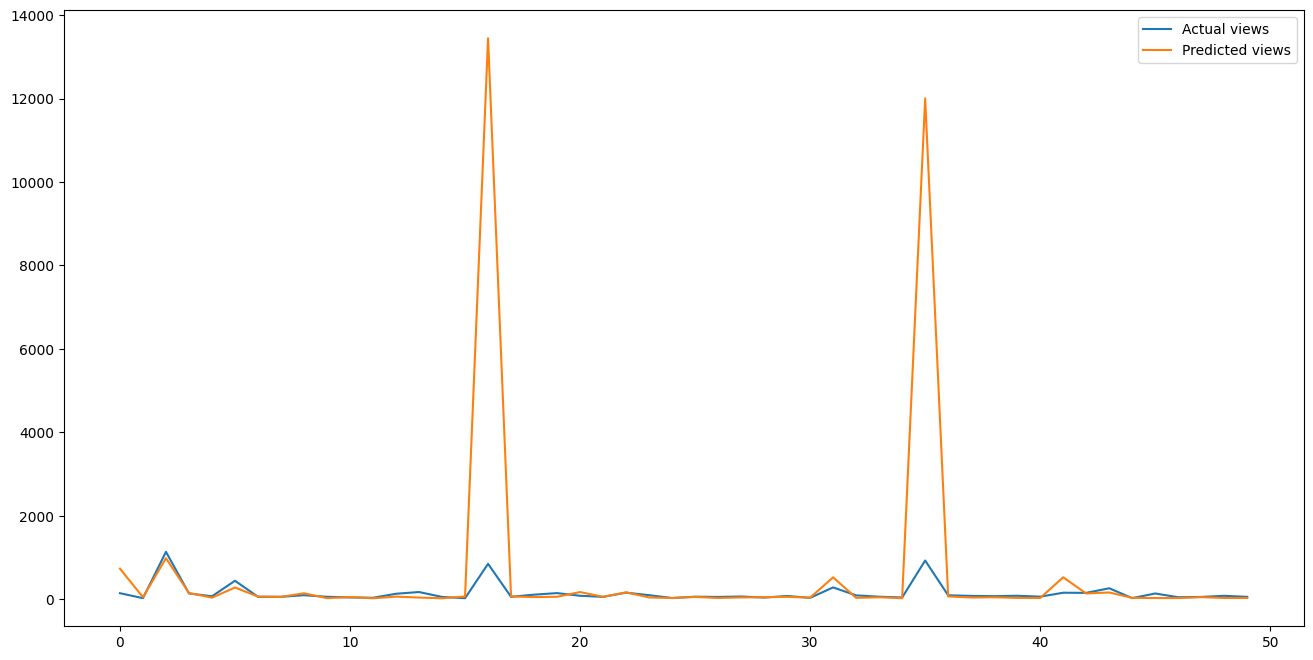

In [552]:
test = pd.DataFrame({'Predicted views':y_pred, 'Actual views':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual views','Predicted views'])

Mejorar los hiperparámetros del modelo:

Para ajustar el modelo PassiveAggressiveRegressor() (o cualquier modelo), hay que mirar qué hiperparámetros están disponibles para ajustar con el model.get_params().

In [553]:
model.get_params()

{'C': 1.0,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'fit_intercept': True,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Hay que seleccionar algunos de los hiperparámetros y agregarlos a un dict() y asignándolos a param_grid. Luego se ejecuta la función GridSearchCV para probar cada combinación única de hiperparámetros y así encontrar los hiperparámetros óptimos del modelo.

In [566]:
param_grid = dict(
 C= [1.0, 1.1, 1.2, 1.3],
 average= [False],
 early_stopping= [False],
 epsilon= [0.1, 0.2, 0.3],
 fit_intercept= [True],
 loss= ['epsilon_insensitive', 'squared_epsilon_insensitive'],
 max_iter= [600, 800, 1000, 1200],
 n_iter_no_change= [3,5,7],
 random_state= [None],
 shuffle= [True],
 tol= [0.001, 0.002, 0.0004],
 validation_fraction= [0.1],
 verbose= [0],
 warm_start= [False])

model = PassiveAggressiveRegressor(random_state=33)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           )

best_model = grid_search.fit(X_train, y_train)
print('Best parameters:', best_model.best_params_)

Optimum parameters {'C': 1.3, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'fit_intercept': True, 'loss': 'epsilon_insensitive', 'max_iter': 600, 'n_iter_no_change': 7, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


FIT del mejor modelo elegido

In [576]:
regressor = PassiveAggressiveRegressor(C=1.3,
 average= False,
 early_stopping= False,
 epsilon= 0.1,
 fit_intercept= True,
 loss= 'epsilon_insensitive',
 max_iter= 600,
 n_iter_no_change= 7,
 random_state= None,
 shuffle= True,
 tol= 0.001,
 validation_fraction= 0.1,
 verbose= 0,
 warm_start= False)

model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE:',round(np.sqrt(mean_squared_error(y_test, y_pred))))
print('RMSE_CV:',round(np.mean(np.sqrt(-scores)))) 

RMSE: 1430
RMSE_CV: 743


NO CONSEGUIMOS MEJORAR. EL TEST HA DADO LA MEJOR OPCIÓN.

# [WIP version] SUPPORT VECTOR MACHINE (Support Vector Regressor) [no parece que vaya a funcionar]

In [545]:
""" import numpy as np
import matplotlib.pyplot as plt """

' import numpy as np\nimport matplotlib.pyplot as plt '

In [546]:
""" X = df.drop(columns=['Visualizaciones', 'Título del vídeo'])
y = df['Visualizaciones'] """

""" X = np.sort(5*np.random.rand(200,1),axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3*(0.5 - np.random.rand(40)) """

' X = np.sort(5*np.random.rand(200,1),axis=0)\nY = np.sin(X).ravel()\nY[::5] += 3*(0.5 - np.random.rand(40)) '

In [547]:
""" plt.scatter(X,y, color="darkorange", label="data") """
# ValueError: x and y must be the same size

' plt.scatter(X,y, color="darkorange", label="data") '

In [548]:
""" 
from sklearn.svm import SVR

C=1e3

svr_lin = SVR(kernel="linear", C=C)
svr_rbf = SVR(kernel="rbf", C=C, gamma=0.1)
svr_pol = SVR(kernel="poly", C=C, degree=3) """

' \nfrom sklearn.svm import SVR\n\nC=1e3\n\nsvr_lin = SVR(kernel="linear", C=C)\nsvr_rbf = SVR(kernel="rbf", C=C, gamma=0.1)\nsvr_pol = SVR(kernel="poly", C=C, degree=3) '

In [549]:
""" y_lin = svr_lin.fit(X,y).predict(X)
y_rbf = svr_rbf.fit(X,y).predict(X)
y_pol = svr_pol.fit(X,y).predict(X) """

' y_lin = svr_lin.fit(X,y).predict(X)\ny_rbf = svr_rbf.fit(X,y).predict(X)\ny_pol = svr_pol.fit(X,y).predict(X) '

In [550]:
""" lw = 2

plt.figure(figsize=(16,9))
plt.scatter(X,y,color="darkorange", label ="data")

plt.plot(X,y_lin, color="navy", lw = lw, label = "SVM Lineal")
plt.plot(X,y_rbf, color="c", lw=lw, label="SVM Radial")
plt.plot(X,y_pol, color="cornflowerblue", label="SVM Polinómico")

plt.xlabel("x")
plt.ylabel("y")

plt.title("Support Vector Regression")
plt.legend()
plt.show() """

' lw = 2\n\nplt.figure(figsize=(16,9))\nplt.scatter(X,y,color="darkorange", label ="data")\n\nplt.plot(X,y_lin, color="navy", lw = lw, label = "SVM Lineal")\nplt.plot(X,y_rbf, color="c", lw=lw, label="SVM Radial")\nplt.plot(X,y_pol, color="cornflowerblue", label="SVM Polinómico")\n\nplt.xlabel("x")\nplt.ylabel("y")\n\nplt.title("Support Vector Regression")\nplt.legend()\nplt.show() '